In [4]:
import pandas as pd
from google.colab import files
import io

In [12]:
titanic_data = files.upload()

Saving tested.csv to tested (1).csv


In [13]:
filename = next(iter(titanic_data))

In [14]:
titanic_data = pd.read_csv(io.BytesIO(titanic_data[filename]))

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
titanic_data.shape

(418, 12)

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
titanic_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [20]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [21]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Preparing Model for Training

In [22]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace = True)

<ipython-input-22-b8bc2a40de03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace = True)


In [23]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [24]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<ipython-input-24-bc2b444396f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [25]:
if 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], prefix='Embarked')
else:
    print("Warning: 'Embarked' column not found in DataFrame. Skipping dummy creation.")

In [26]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  ... Embarked_C Embarked_Q  Embarked_S
0          892         0       3  ...      False       True       False
1          893         1       3  ...      False      False        True
2          894         0       2  ...      False       True       False
3          895         0       3  ...      False      False        True
4          896         1       3  ...      False      False        True

[5 rows x 13 columns]


In [27]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [28]:
titanic_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [29]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [30]:
titanic_data['IsAlone'] = 1
titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0

<ipython-input-30-e6e28bbd202c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0
<ipython-input-30-e6e28bbd202c>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [31]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [32]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,male,34.5,0,0,7.8292,False,True,False,1,1
1,1,3,female,47.0,1,0,7.0000,False,False,True,2,0
2,0,2,male,62.0,0,0,9.6875,False,True,False,1,1
3,0,3,male,27.0,0,0,8.6625,False,False,True,1,1
4,1,3,female,22.0,1,1,12.2875,False,False,True,3,0


Training Model

In [33]:
x = titanic_data.drop('Survived', axis=1)

In [34]:
y = titanic_data['Survived']

In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=2529)

In [39]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((125, 11), (293, 11), (125,), (293,))

In [40]:
x_train, x_test = x_test, x_train

In [41]:
y_train, y_test =y_test ,y_train

In [42]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((293, 11), (125, 11), (293,), (125,))

In [43]:
label_encoder = LabelEncoder()

In [44]:
x_train['Sex'] = x_train['Sex'].astype(str)
x_test['Sex'] = x_test['Sex'].astype(str)

In [45]:
all_sex_values = pd.concat([x_train['Sex'], x_test['Sex']]).unique()
label_encoder.fit(all_sex_values)

LabelEncoder()

In [46]:
label_encoder.fit(x_train['Sex'])

LabelEncoder()

In [47]:
x_train['Sex'] = label_encoder.fit_transform(x_train['Sex'])

In [48]:
x_test['Sex'] = label_encoder.fit_transform(x_test['Sex'])

In [52]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [53]:
model = RandomForestClassifier(n_estimators=1000)

In [54]:
model.fit(x_train, y_train_encoded)

RandomForestClassifier(n_estimators=1000)

Prediction

In [55]:
y_pred = model.predict(x_test)

In [56]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
accuracy = accuracy_score(y_test, y_pred)

In [59]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [60]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[73  0]
 [ 0 52]]


In [61]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        52

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Model Evaluation

In [62]:
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)

Graphical Representation

<Axes: >

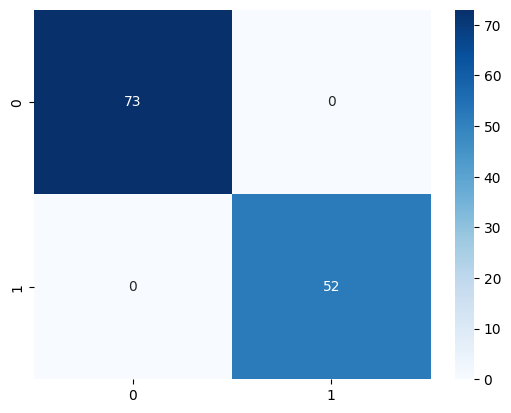

In [65]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')